# Introduction

This in the introductory section of the final assignment of IBM Applied Data Science Capstone course on Coursera. Here, the students are asked to be as creative as they want to implement Foursquare API and clustering algorithm to explore or compare neighbourhoods or cities of their choice. Based on these instructions, I have decided to compare the neighbourhoods of New York City, particularly the borough of Manhattan in order to find out which neighbourhood is the best to open a restaurant.

## Business problem and who this project is aimed at

Comparing neighbourhoods can be quite daunting due to their cosmopolitan and extremely busy lifestyles. However, this project aims to be of use to you through the analysis and comparison of the neighbourhoods in Manhattan. I have chosen Manhattan as it is my intention to carry out an indepth analysis on the neighbourhoods of thos area. I have made this decision due to the high population density  and commercial lifestyle of Manhattan. The people who can hope to benefit from this project are

- Those who are planning to migrate to Manhattan
- A New Yorker trying to change neighbourhoods to find a more happening area
- Those who would like to expand or open their businesses in Manhattan, NYC

 ## Aim and Objectives

This project aims to compare the neighbourhoods of Manhattan based on crime rates, rent data, and other similarities. In order to satisfy the criteria, the following will be the immediate objectives:

- Collecting crime rate data in Manhattan
- Collecting venues data in Manhattan
- Clustering the neighbourhoods based on the similarities of restaurants
- Making a few key recommendations regarding the business opportunities in Manhattan

## Weather data and its Analysis

The reason for analysing weather first is because of its important effect on human behaviour.
For example, on a rainy day, one might crave a hot beverage. On a warm sunny day, one might prefer desert. In addition to all this, having sound knowledge of the weather data and patterns can also help restaurant owners as they can make additions which will make their menus more appetizing!

### Procedure

- First the data for the year 2019 was obtained from www.currentresults.com
- Then the data was cleaned and organized to obtain the dataframe as shown below
- After obtaining the df shown below, the average temperatures were calculated and three graphs, depicting important statistics were plotted. 

In [3]:
import pandas as pd
import numpy as np
weather = pd.read_excel('ny.xlsx')

In [4]:
weather.head()

High_F  Low_F     Month  Days over 70F  Days over 90F  Days_below_32F  \
0      39     27   January              0              0              20   
1      42     29  February              0              0              18   
2      50     35     March              1              0              10   
3      63     46     April              6              0               1   
4      73     56       May             16              1               0   

   Days_below_20F  
0               8  
1               4  
2               1  
3               0  
4               0

In [5]:
weather_stats = weather.describe()
weather_stats

High_F      Low_F  Days over 70F  Days over 90F  Days_below_32F  \
count  12.000000  12.000000      12.000000      12.000000       12.000000   
mean   63.333333  49.083333      11.666667       1.083333        5.500000   
std    17.009801  15.721776      12.485143       1.831955        7.786935   
min    39.000000  27.000000       0.000000       0.000000        0.000000   
25%    48.750000  35.000000       0.750000       0.000000        0.000000   
50%    64.500000  49.500000       6.500000       0.000000        0.500000   
75%    78.500000  63.250000      23.750000       1.250000       11.000000   
max    86.000000  71.000000      30.000000       6.000000       20.000000   

       Days_below_20F  
count       12.000000  
mean         1.333333  
std          2.498484  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.500000  
max          8.000000

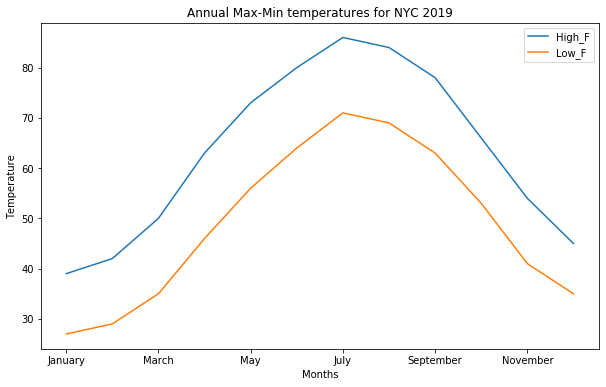

In [6]:
#The line plot for showing the max and min temps
import matplotlib.pyplot as plt
weather.plot(x='Month', y=['High_F','Low_F'], figsize = (10,6), kind = 'line')
plt.title('Annual Max-Min temperatures for NYC 2019')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.show()

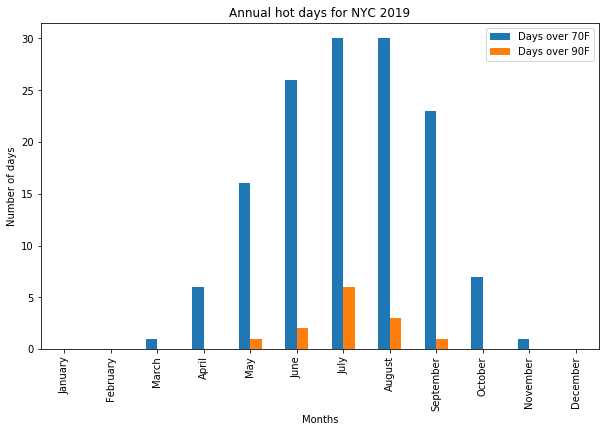

In [7]:
weather.plot(x='Month', y=['Days over 70F','Days over 90F'], figsize = (10,6), kind = 'bar')
plt.title('Annual hot days for NYC 2019')
plt.xlabel('Months')
plt.ylabel('Number of days')
plt.show()

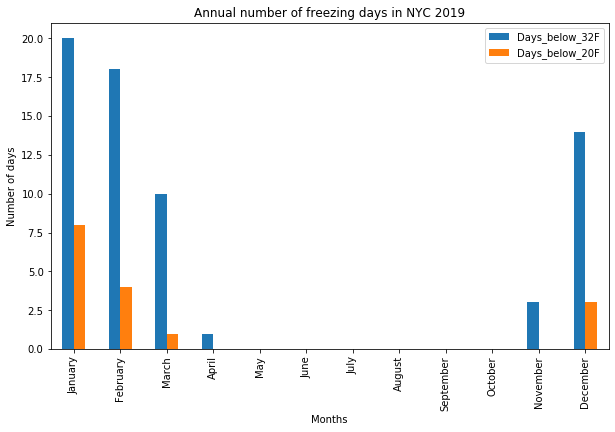

In [8]:
weather.plot(x='Month', y=['Days_below_32F','Days_below_20F'], figsize = (10,6), kind = 'bar')
plt.title('Annual number of freezing days in NYC 2019')
plt.xlabel('Months')
plt.ylabel('Number of days')
plt.show()

All the required libraries for further analysis were imported after the weather analysation

In [9]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
!pip install geopy 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium  
import folium 
print('Libraries imported.')

Libraries imported.


##  Data acquisition for Manhattan's neighbourhoods

The NYCloc csv file contains all the data on the neighbourhoods of Nyc. This file was obtained from the week 3 lab in the IBM 'Applied Data Science Capstone project' course.

This csv file was further segmented into 5 different dataframes, with one dataframe per each borough. The Manhattan borough is of significant importance as all the analysis has been carried out on it.

In [10]:
nyc=pd.read_csv('NYCloc.csv')
nyc.head()

Unnamed: 0 Borough Neighborhood   Latitude  Longitude
0           0   Bronx    Wakefield  40.894705 -73.847201
1           1   Bronx   Co-op City  40.874294 -73.829939
2           2   Bronx  Eastchester  40.887556 -73.827806
3           3   Bronx    Fieldston  40.895437 -73.905643
4           4   Bronx    Riverdale  40.890834 -73.912585

In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_locator")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


### A map of NYC with all its neighbourhoods superimposed on top. 

In [12]:
#an initial map with the neighbourhoods of NYC superimposed on it
mapnyc = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, borough, neighborhood in zip(nyc['Latitude'], nyc['Longitude'], nyc['Borough'], nyc['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.8,
        parse_html=False).add_to(mapnyc)  
    
mapnyc

In [13]:
#creating 5 new dataframes for the 5 different boroughs of NYC
man_data = nyc[nyc['Borough'] == 'Manhattan'].reset_index(drop=True)
man_data.head()

Unnamed: 0    Borough        Neighborhood   Latitude  Longitude
0           6  Manhattan         Marble Hill  40.876551 -73.910660
1         100  Manhattan           Chinatown  40.715618 -73.994279
2         101  Manhattan  Washington Heights  40.851903 -73.936900
3         102  Manhattan              Inwood  40.867684 -73.921210
4         103  Manhattan    Hamilton Heights  40.823604 -73.949688

In [14]:
brook_data=nyc[nyc['Borough'] == 'Brooklyn'].reset_index(drop=True)
brook_data.head()

Unnamed: 0   Borough Neighborhood   Latitude  Longitude
0          46  Brooklyn    Bay Ridge  40.625801 -74.030621
1          47  Brooklyn  Bensonhurst  40.611009 -73.995180
2          48  Brooklyn  Sunset Park  40.645103 -74.010316
3          49  Brooklyn   Greenpoint  40.730201 -73.954241
4          50  Brooklyn    Gravesend  40.595260 -73.973471

In [15]:
bronx_data=nyc[nyc['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data.head()

Unnamed: 0 Borough Neighborhood   Latitude  Longitude
0           0   Bronx    Wakefield  40.894705 -73.847201
1           1   Bronx   Co-op City  40.874294 -73.829939
2           2   Bronx  Eastchester  40.887556 -73.827806
3           3   Bronx    Fieldston  40.895437 -73.905643
4           4   Bronx    Riverdale  40.890834 -73.912585

In [16]:
queens_data=nyc[nyc['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head()

Unnamed: 0 Borough     Neighborhood   Latitude  Longitude
0         129  Queens          Astoria  40.768509 -73.915654
1         130  Queens         Woodside  40.746349 -73.901842
2         131  Queens  Jackson Heights  40.751981 -73.882821
3         132  Queens         Elmhurst  40.744049 -73.881656
4         133  Queens     Howard Beach  40.654225 -73.838138

In [17]:
stat_data=nyc[nyc['Borough'] == 'Staten Island'].reset_index(drop=True)
stat_data.head()

Unnamed: 0        Borough   Neighborhood   Latitude  Longitude
0         197  Staten Island     St. George  40.644982 -74.079353
1         198  Staten Island   New Brighton  40.640615 -74.087017
2         199  Staten Island      Stapleton  40.626928 -74.077902
3         200  Staten Island       Rosebank  40.615305 -74.069805
4         201  Staten Island  West Brighton  40.631879 -74.107182

## Analysing Manhattan's neighbourhoods and restaurants

The procedure that has been implemented here is

- First a map of Manhattan with a clear layout of all its neighbourhoods has been plotted
- Then using the Foursquare API, important venue data such as parks, restaurants, theatres etc. have been called for and    inserted into a dataframe
- This resulting dataframe has been further polished by dropping all venues that aren't restaurants. By doing so, a dataframe containing only the restaurants per each neighbourhood in manhattan has been obtained

In [18]:
#first a map of Manhattan and its neighbourhoods to get a clear picture of its layout
map_man = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, label in zip(man_data['Latitude'], man_data['Longitude'], man_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_man)  
    
map_man

In [19]:
CLIENT_ID = '3HRSHG5TU25FLDR52XLMP3MLHJPXIL0AFJ3CSLBIVTGNCLCU' 
CLIENT_SECRET = 'PX1ALYUZL2QJD4KDZISJKZRK0Q14LMBREP2G3RMWEMMPCUWT' 
VERSION = '20180605' 

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
      
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
man_venues = getNearbyVenues(names=man_data['Neighborhood'],
                                   latitudes=man_data['Latitude'],
                                   longitudes=man_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [22]:
man_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066       Arturo's   
1  Marble Hill              40.876551               -73.91066    Bikram Yoga   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066      Starbucks   
4  Marble Hill              40.876551               -73.91066        Dunkin'   

   Venue Latitude  Venue Longitude Venue Category  
0       40.874412       -73.910271    Pizza Place  
1       40.876844       -73.906204    Yoga Studio  
2       40.880404       -73.908937          Diner  
3       40.877531       -73.905582    Coffee Shop  
4       40.877136       -73.906666     Donut Shop

In [23]:
manres = man_venues.groupby('Venue Category').count()
manres=manres.reset_index()
manres = manres.rename(columns = {"Venue Category":"Venue_Category"})
manres.head()

Venue_Category  Neighborhood  Neighborhood Latitude  \
0    Accessories Store             1                      1   
1       Adult Boutique             1                      1   
2    Afghan Restaurant             1                      1   
3   African Restaurant             3                      3   
4  American Restaurant            69                     69   

   Neighborhood Longitude  Venue  Venue Latitude  Venue Longitude  
0                       1      1               1                1  
1                       1      1               1                1  
2                       1      1               1                1  
3                       3      3               3                3  
4                      69     69              69               69

### A dataframe containing the most popular type of restaurants among all the neighborhoods has been obtained and shown below

In [24]:
manres = manres[manres.Venue_Category.str.contains("Restaurant")]

In [25]:
manres=manres.sort_values(by=['Neighborhood'], ascending=False)
manres

Venue_Category  Neighborhood  Neighborhood Latitude  \
163               Italian Restaurant            99                     99   
4                American Restaurant            69                     69   
193               Mexican Restaurant            56                     56   
58                Chinese Restaurant            45                     45   
288                 Sushi Restaurant            41                     41   
165              Japanese Restaurant            40                     40   
121                French Restaurant            37                     37   
262               Seafood Restaurant            36                     36   
301                  Thai Restaurant            31                     31   
190         Mediterranean Restaurant            31                     31   
158                Indian Restaurant            22                     22   
207          New American Restaurant            21                     21   
174                Korean Restaurant            19                     19   
314    Vegetarian / Vegan Restaurant            18                     18   
135                 Greek Restaurant            18                     18   
248                       Restaurant            16                     16   
318            Vietnamese Restaurant            16                     16   
79                  Cuban Restaurant            15                     15   
176        Latin American Restaurant            14                     14   
12                  Asian Restaurant            11                     11   
242                 Ramen Restaurant            11                     11   
278               Spanish Restaurant            11                     11   
55              Caribbean Restaurant            10                     10   
311               Turkish Restaurant             9                      9   
108               Falafel Restaurant             9                      9   
110             Fast Food Restaurant             8                      8   
294                 Tapas Restaurant             7                      7   
8             Argentinian Restaurant             5                      5   
194        Middle Eastern Restaurant             5                      5   
15             Australian Restaurant             4                      4   
263              Shanghai Restaurant             4                      4   
226              Peruvian Restaurant             4                      4   
111              Filipino Restaurant             4                      4   
89                Dim Sum Restaurant             4                      4   
131                German Restaurant             3                      3   
178              Lebanese Restaurant             3                      3   
7                   Arepa Restaurant             3                      3   
104             Ethiopian Restaurant             3                      3   
184                 Malay Restaurant             3                      3   
97               Dumpling Restaurant             3                      3   
3                 African Restaurant             3                      3   
276  Southern / Soul Food Restaurant             3                      3   
143              Hawaiian Restaurant             3                      3   
225               Persian Restaurant             2                      2   
274        South American Restaurant             2                      2   
275          South Indian Restaurant             2                      2   
16               Austrian Restaurant             2                      2   
293             Taiwanese Restaurant             2                      2   
290              Szechuan Restaurant             2                      2   
198       Modern European Restaurant             2                      2   
168                Jewish Restaurant             2                      2   
164        Japanes

In [26]:
man_venues1=man_venues.reset_index()
man_venues1 = man_venues.rename(columns = {"Venue Category":"Venue_Category"})
man_venues1.head()


Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066       Arturo's   
1  Marble Hill              40.876551               -73.91066    Bikram Yoga   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066      Starbucks   
4  Marble Hill              40.876551               -73.91066        Dunkin'   

   Venue Latitude  Venue Longitude Venue_Category  
0       40.874412       -73.910271    Pizza Place  
1       40.876844       -73.906204    Yoga Studio  
2       40.880404       -73.908937          Diner  
3       40.877531       -73.905582    Coffee Shop  
4       40.877136       -73.906666     Donut Shop

### A dataframe containing only the restaurants per neighbourhood

In [27]:
man_venues1 = man_venues1[man_venues1.Venue_Category.str.contains("Restaurant")]
man_venues1

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
7             Marble Hill              40.876551              -73.910660   
14            Marble Hill              40.876551              -73.910660   
27              Chinatown              40.715618              -73.994279   
34              Chinatown              40.715618              -73.994279   
35              Chinatown              40.715618              -73.994279   
36              Chinatown              40.715618              -73.994279   
40              Chinatown              40.715618              -73.994279   
41              Chinatown              40.715618              -73.994279   
42              Chinatown              40.715618              -73.994279   
47              Chinatown              40.715618              -73.994279   
49              Chinatown              40.715618              -73.994279   
51              Chinatown              40.715618              -73.994279   
53              Chinatown              40.715618              -73.994279   
58              Chinatown              40.715618              -73.994279   
59              Chinatown              40.715618              -73.994279   
63              Chinatown              40.715618              -73.994279   
64              Chinatown              40.715618              -73.994279   
66              Chinatown              40.715618              -73.994279   
69              Chinatown              40.715618              -73.994279   
74              Chinatown              40.715618              -73.994279   
79              Chinatown              40.715618              -73.994279   
80              Chinatown              40.715618              -73.994279   
82              Chinatown              40.715618              -73.994279   
84              Chinatown              40.715618              -73.994279   
90              Chinatown              40.715618              -73.994279   
92              Chinatown              40.715618              -73.994279   
93              Chinatown              40.715618              -73.994279   
95              Chinatown              40.715618              -73.994279   
96              Chinatown              40.715618              -73.994279   
97              Chinatown              40.715618              -73.994279   
100             Chinatown              40.715618              -73.994279   
101             Chinatown              40.715618              -73.994279   
106             Chinatown              40.715618              -73.994279   
109             Chinatown              40.715618              -73.994279   
110             Chinatown              40.715618              -73.994279   
111             Chinatown              40.715618              -73.994279   
117             Chinatown              40.715618              -73.994279   
121             Chinatown              40.715618              -73.994279   
125             Chinatown              40.715618              -73.994279   
127    Washington Heights              40.851903              -73.936900   
131    Washington Heights              40.851903              -73.936900   
136    Washington Heights              40.851903              -73.936900   
145    Washington Heights              40.851903              -73.936900   
146    Washington Heights              40.851903              -73.936900   
148    Washington Heights              40.851903              -73.936900   
151    Washington Heights              40.851903              -73.936900   
152    Washington Heights              40.851903              -73.936900   
153    Washington Heights              40.851903              -73.936900   
155    Washington Heights              40.851903              -73.936900   
156    Washington Heights              40.851903              -73.936900   
159    Washington Heights              40.851903              -73.936900   
160    Washington Heights              40.851903             

In [28]:
man_venuesneigh = man_venues1.groupby('Neighborhood').count()
man_venuesneigh = man_venuesneigh.drop(['Neighborhood Latitude','Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude'], axis = 1)

### The above dataframe has been further cleaned to display a table of neighbourhoods with the highest number of restaurants 

In [29]:
man_venuesneigh = man_venuesneigh.sort_values(by=['Venue'], ascending=False)
man_venuesneigh


Venue  Venue_Category
Neighborhood                              
Chinatown               37              37
East Village            37              37
Greenwich Village       34              34
Little Italy            34              34
Noho                    32              32
Turtle Bay              30              30
Upper West Side         30              30
Yorkville               29              29
Midtown South           29              29
West Village            27              27
Lenox Hill              26              26
Tudor City              25              25
Soho                    25              25
Murray Hill             25              25
Washington Heights      24              24
Civic Center            24              24
Sutton Place            23              23
Financial District      22              22
Upper East Side         22              22
Flatiron                22              22
Carnegie Hill           21              21
Tribeca                 20              20
Midtown                 18              18
Gramercy                18              18
Inwood                  18              18
Clinton                 17              17
Lincoln Square          17              17
Hamilton Heights        17              17
Manhattanville          17              17
Chelsea                 16              16
East Harlem             15              15
Central Harlem          15              15
Manhattan Valley        14              14
Lower East Side         14              14
Morningside Heights     10              10
Hudson Yards            10              10
Roosevelt Island         3               3
Battery Park City        3               3
Marble Hill              2               2
Stuyvesant Town          1               1

- Now that we have a count of all the restaurants per neighbourhood, we can determine the places with the most potential for growth. I would recommend staying away from the top 5 neighbourhoods in the above dataframe as those areas are already saturated. The ideal neighborhoods to start a restaurant would be with a restaurant count between 20-25. The reason for this observation is that a neighbourhood within the aforementioned range not only has room for growth, but it will most definitely have lower rent prices as well as lower competition to begin with. However, this is only a calculated personal observation at best.

In [30]:
countres=[20,21,22,23,24,25]

In [31]:
man_2025=man_venuesneigh[man_venuesneigh['Venue'].isin(countres)]

- Going ahead, the 8 neighbourhoods selected below will be further analysed with the help of clustering, crime data, and detailed venue data

In [32]:
man_2025

Venue  Venue_Category
Neighborhood                             
Tudor City             25              25
Soho                   25              25
Murray Hill            25              25
Washington Heights     24              24
Civic Center           24              24
Sutton Place           23              23
Financial District     22              22
Upper East Side        22              22
Flatiron               22              22
Carnegie Hill          21              21
Tribeca                20              20

In [33]:
neighnames=['Tudor City','Soho','Flatiron','Washington Heights','Upper East Side','Sutton Place','Financial District','Tribeca']

In [34]:
man_final=man_venues1[man_venues1['Neighborhood'].isin(neighnames)]

In [35]:
man_final

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
127   Washington Heights              40.851903              -73.936900   
131   Washington Heights              40.851903              -73.936900   
136   Washington Heights              40.851903              -73.936900   
145   Washington Heights              40.851903              -73.936900   
146   Washington Heights              40.851903              -73.936900   
148   Washington Heights              40.851903              -73.936900   
151   Washington Heights              40.851903              -73.936900   
152   Washington Heights              40.851903              -73.936900   
153   Washington Heights              40.851903              -73.936900   
155   Washington Heights              40.851903              -73.936900   
156   Washington Heights              40.851903              -73.936900   
159   Washington Heights              40.851903              -73.936900   
160   Washington Heights              40.851903              -73.936900   
169   Washington Heights              40.851903              -73.936900   
170   Washington Heights              40.851903              -73.936900   
171   Washington Heights              40.851903              -73.936900   
173   Washington Heights              40.851903              -73.936900   
176   Washington Heights              40.851903              -73.936900   
177   Washington Heights              40.851903              -73.936900   
182   Washington Heights              40.851903              -73.936900   
184   Washington Heights              40.851903              -73.936900   
186   Washington Heights              40.851903              -73.936900   
199   Washington Heights              40.851903              -73.936900   
212   Washington Heights              40.851903              -73.936900   
459      Upper East Side              40.775639              -73.960508   
473      Upper East Side              40.775639              -73.960508   
474      Upper East Side              40.775639              -73.960508   
476      Upper East Side              40.775639              -73.960508   
481      Upper East Side              40.775639              -73.960508   
482      Upper East Side              40.775639              -73.960508   
483      Upper East Side              40.775639              -73.960508   
490      Upper East Side              40.775639              -73.960508   
493      Upper East Side              40.775639              -73.960508   
496      Upper East Side              40.775639              -73.960508   
499      Upper East Side              40.775639              -73.960508   
502      Upper East Side              40.775639              -73.960508   
508      Upper East Side              40.775639              -73.960508   
510      Upper East Side              40.775639              -73.960508   
519      Upper East Side              40.775639              -73.960508   
523      Upper East Side              40.775639              -73.960508   
528      Upper East Side              40.775639              -73.960508   
531      Upper East Side              40.775639              -73.960508   
534      Upper East Side              40.775639              -73.960508   
535      Upper East Side              40.775639              -73.960508   
536      Upper East Side              40.775639              -73.960508   
544      Upper East Side              40.775639              -73.960508   
1575             Tribeca              40.721522              -74.010683   
1577             Tribeca              40.721522              -74.010683   
1587             Tribeca              40.721522              -74.010683   
1588             Tribeca              40.721522              -74.010683   
1592             Tribeca              40.721522              -74.010683   
1595             Tribeca              40.721522              -74.010683   
1597             Tribeca             

In [36]:
man_final1=man_final.groupby(['Neighborhood','Venue_Category']).count()

In [37]:
man_final1=man_final1.drop(['Neighborhood Latitude','Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude'], axis = 1)

In [38]:
man_final1

Venue
Neighborhood       Venue_Category                      
Financial District American Restaurant                5
                   Falafel Restaurant                 3
                   Fast Food Restaurant               1
                   French Restaurant                  1
                   Italian Restaurant                 3
                   Japanese Restaurant                2
                   Mediterranean Restaurant           1
                   Mexican Restaurant                 3
                   New American Restaurant            1
                   Restaurant                         1
                   Seafood Restaurant                 1
Flatiron           American Restaurant                2
                   Cuban Restaurant                   1
                   Fast Food Restaurant               1
                   Indian Restaurant                  1
                   Italian Restaurant                 4
                   Japanese Restaurant                2
                   Kebab Restaurant                   1
                   Mediterranean Restaurant           3
                   New American Restaurant            1
                   Restaurant                         1
                   Russian Restaurant                 1
                   Sushi Restaurant                   1
                   Thai Restaurant                    1
                   Vegetarian / Vegan Restaurant      2
Soho               American Restaurant                1
                   Australian Restaurant              1
                   Egyptian Restaurant                1
                   Falafel Restaurant                 1
                   French Restaurant                  2
                   Italian Restaurant                 7
                   Mediterranean Restaurant           4
                   Mexican Restaurant                 1
                   Seafood Restaurant                 1
                   Spanish Restaurant                 1
                   Sushi Restaurant                   2
                   Tapas Restaurant                   1
                   Thai Restaurant                    1
                   Vegetarian / Vegan Restaurant      1
Sutton Place       American Restaurant                1
                   Asian Restaurant                   1
                   Cambodian Restaurant               1
                   French Restaurant                  1
                   Greek Restaurant                   1
                   Indian Restaurant                  1
                   Italian Restaurant                 4
                   Latin American Restaurant          2
                   Lebanese Restaurant                1
                   Mexican Restaurant                 2
                   Persian Restaurant                 1
                   Restaurant                         1
                   Seafood Restaurant                 1
                   Sushi Restaurant                   1
                   Tapas Restaurant                   1
                   Thai Restaurant                    1
                   Vegetarian / Vegan Restaurant      2
Tribeca            American Restaurant                4
                   Argentinian Restaurant             1
                   Chinese Restaurant                 1
                   French Restaurant                  2
                   Greek Restaurant                   2
                   Indian Restaurant                  1
                   Italian Restaurant                 5
                   Korean Restaurant                  1
                   Modern European Restaurant         1
                   Seafood Restaurant                 1
                   Sushi Restaurant                   1
Tudor City         American Restaurant                1
                   Asian Restaurant                   2
                   French Restaurant                  1
                  

In [39]:
man_finalsort = man_final1.sort_values(by='Venue', ascending=False)

In [40]:
man_finalsort

Venue
Neighborhood       Venue_Category                      
Soho               Italian Restaurant                 7
Upper East Side    Italian Restaurant                 6
Financial District American Restaurant                5
Tribeca            Italian Restaurant                 5
Flatiron           Italian Restaurant                 4
Tudor City         Mexican Restaurant                 4
Sutton Place       Italian Restaurant                 4
Soho               Mediterranean Restaurant           4
Tribeca            American Restaurant                4
Flatiron           Mediterranean Restaurant           3
Tudor City         Sushi Restaurant                   3
Financial District Mexican Restaurant                 3
                   Falafel Restaurant                 3
                   Italian Restaurant                 3
Washington Heights Chinese Restaurant                 3
Tudor City         Thai Restaurant                    2
Upper East Side    Mexican Restaurant                 2
Tudor City         Vietnamese Restaurant              2
Soho               French Restaurant                  2
Upper East Side    American Restaurant                2
Tudor City         Asian Restaurant                   2
Upper East Side    Sushi Restaurant                   2
Soho               Sushi Restaurant                   2
Sutton Place       Vegetarian / Vegan Restaurant      2
Upper East Side    French Restaurant                  2
Tudor City         Seafood Restaurant                 2
Financial District Japanese Restaurant                2
Tribeca            Greek Restaurant                   2
Sutton Place       Latin American Restaurant          2
                   Mexican Restaurant                 2
Flatiron           American Restaurant                2
                   Vegetarian / Vegan Restaurant      2
Washington Heights Latin American Restaurant          2
                   Tapas Restaurant                   2
                   Mexican Restaurant                 2
Tudor City         Greek Restaurant                   2
Washington Heights New American Restaurant            2
Tribeca            French Restaurant                  2
Washington Heights Spanish Restaurant                 2
Flatiron           Japanese Restaurant                2
Tudor City         Hawaiian Restaurant                1
                   Jewish Restaurant                  1
                   Japanese Restaurant                1
                   Spanish Restaurant                 1
                   Shanghai Restaurant                1
Financial District French Restaurant                  1
Tudor City         Restaurant                         1
Upper East Side    Seafood Restaurant                 1
                   Chinese Restaurant                 1
Washington Heights Caribbean Restaurant               1
                   Sushi Restaurant                   1
                   South American Restaurant          1
                   Seafood Restaurant                 1
                   Restaurant                         1
                   Ramen Restaurant                   1
                   Italian Restaurant                 1
                   Indian Restaurant                  1
                   Arepa Restaurant                   1
Financial District Fast Food Restaurant               1
Washington Heights American Restaurant                1
Upper East Side    Vegetarian / Vegan Restaurant      1
                   Thai Restaurant                    1
                   Tapas Restaurant                   1
                   North Indian Restaurant            1
                   Mediterranean Restaurant           1
                   Latin American Restaurant          1
Tudor City         French Restaurant                  1
Financial District Restaurant                         1
Tudor City         American Restaurant                1
Tribeca            Sushi Restaurant                   1
Soho              

Below is the rent data for the above mentioned 8 neighbourhoods. The rent data has been gathered from propertyshark.com

In [41]:
Rent_data=pd.read_excel('Rent Manhattan.xlsx')

In [42]:
Rent_data

Neighborhood  Low_Rent_sqft   High_Rent_sqft
0       Financial District              40              50
1  Tudor City+surroundings              68              78
2                     Soho              75              90
3                Flatiron               60              77
4        Washinton Heights              35              55
5          Upper East Side              65              75
6             Sutton Place              70              80
7                  Tribeca              50              60

If we were to visualize the rent distribution amongst the neighbourhoods, a line graph would provide a very clear picture as to which locality has one of the cheapest prices.

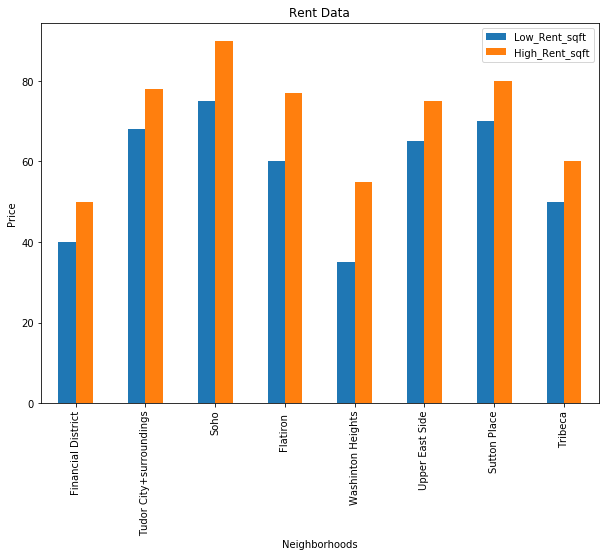

In [43]:
Rent_data.plot( x='Neighborhood',figsize = (10,7), kind = 'bar')
plt.title('Rent Data')
plt.xlabel('Neighborhoods')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [44]:
Crime_data=pd.read_csv('crimedata1.csv')

In [45]:
Crime_data

Neighbourhoods                              CRIME  2014  \
0  Financial District, Tribeca, Soho  TOTAL SEVEN MAJOR FELONY OFFENSES  1208   
1                           Flatiron  TOTAL SEVEN MAJOR FELONY OFFENSES  2061   
2           Tudor City, Sutton Place  TOTAL SEVEN MAJOR FELONY OFFENSES   909   
3                    Upper East Side  TOTAL SEVEN MAJOR FELONY OFFENSES  1913   
4                 Washington Heights  TOTAL SEVEN MAJOR FELONY OFFENSES  1151   

   2015  2016  2017  2018  2019  
0  1446  1395  1337  1356  1386  
1  2056  1879  1694  1954  2014  
2   986  1000  1023  1021  1116  
3  1904  1959  1972  2063  2273  
4  1315  1323  1382  1377  1278

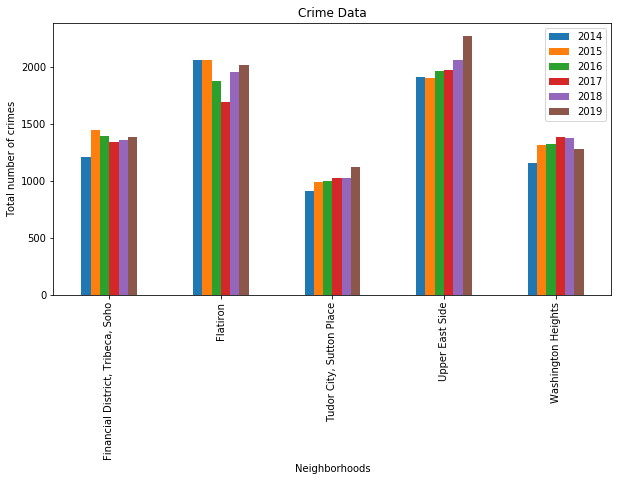

In [46]:
Crime_data.plot(x='Neighbourhoods', figsize = (10,5), kind = 'bar')
plt.title('Crime Data')
plt.xlabel('Neighborhoods')
plt.ylabel('Total number of crimes')
plt.xticks(rotation=90)
plt.show()

## K Means Clustering

In [47]:
man_onehot = pd.get_dummies(man_final[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
man_onehot['Neighborhood'] = man_final['Neighborhood'] 
fixed_columns = [man_onehot.columns[-1]] + list(man_onehot.columns[:-1])
man_onehot = man_onehot[fixed_columns]

man_onehot

Neighborhood  American Restaurant  Arepa Restaurant  \
127   Washington Heights                    0                 0   
131   Washington Heights                    0                 0   
136   Washington Heights                    0                 0   
145   Washington Heights                    1                 0   
146   Washington Heights                    0                 0   
148   Washington Heights                    0                 0   
151   Washington Heights                    0                 0   
152   Washington Heights                    0                 0   
153   Washington Heights                    0                 0   
155   Washington Heights                    0                 0   
156   Washington Heights                    0                 0   
159   Washington Heights                    0                 0   
160   Washington Heights                    0                 0   
169   Washington Heights                    0                 0   
170   Washington Heights                    0                 0   
171   Washington Heights                    0                 0   
173   Washington Heights                    0                 0   
176   Washington Heights                    0                 0   
177   Washington Heights                    0                 1   
182   Washington Heights                    0                 0   
184   Washington Heights                    0                 0   
186   Washington Heights                    0                 0   
199   Washington Heights                    0                 0   
212   Washington Heights                    0                 0   
459      Upper East Side                    0                 0   
473      Upper East Side                    1                 0   
474      Upper East Side                    0                 0   
476      Upper East Side                    0                 0   
481      Upper East Side                    0                 0   
482      Upper East Side                    0                 0   
483      Upper East Side                    0                 0   
490      Upper East Side                    0                 0   
493      Upper East Side                    0                 0   
496      Upper East Side                    0                 0   
499      Upper East Side                    0                 0   
502      Upper East Side                    0                 0   
508      Upper East Side                    0                 0   
510      Upper East Side                    0                 0   
519      Upper East Side                    0                 0   
523      Upper East Side                    0                 0   
528      Upper East Side                    0                 0   
531      Upper East Side                    1                 0   
534      Upper East Side                    0                 0   
535      Upper East Side                    0                 0   
536      Upper East Side                    0                 0   
544      Upper East Side                    0                 0   
1575             Tribeca                    0                 0   
1577             Tribeca                    0                 0   
1587             Tribeca                    0                 0   
1588             Tribeca                    1                 0   
1592             Tribeca                    1                 0   
1595             Tribeca                    0                 0   
1597             Tribeca                    0                 0   
1598             Tribeca                    0                 0   
1600             Tribeca                    0                 0   
1607             Tribeca                    0                 0   
1613             Tribeca                    1                 0   
1618             Tribeca                    0                 0   
1628             Tribeca                    0              

In [48]:
man_grouped = man_onehot.groupby('Neighborhood').mean().reset_index()
man_grouped

Neighborhood  American Restaurant  Arepa Restaurant  \
0  Financial District             0.227273          0.000000   
1            Flatiron             0.090909          0.000000   
2                Soho             0.040000          0.000000   
3        Sutton Place             0.043478          0.000000   
4             Tribeca             0.200000          0.000000   
5          Tudor City             0.040000          0.000000   
6     Upper East Side             0.090909          0.000000   
7  Washington Heights             0.041667          0.041667   

   Argentinian Restaurant  Asian Restaurant  Australian Restaurant  \
0                    0.00          0.000000                   0.00   
1                    0.00          0.000000                   0.00   
2                    0.00          0.000000                   0.04   
3                    0.00          0.043478                   0.00   
4                    0.05          0.000000                   0.00   
5                    0.00          0.080000                   0.00   
6                    0.00          0.000000                   0.00   
7                    0.00          0.000000                   0.00   

   Cambodian Restaurant  Caribbean Restaurant  Chinese Restaurant  \
0              0.000000              0.000000            0.000000   
1              0.000000              0.000000            0.000000   
2              0.000000              0.000000            0.000000   
3              0.043478              0.000000            0.000000   
4              0.000000              0.000000            0.050000   
5              0.000000              0.000000            0.000000   
6              0.000000              0.000000            0.045455   
7              0.000000              0.041667            0.125000   

   Cuban Restaurant  Egyptian Restaurant  Falafel Restaurant  \
0          0.000000                 0.00            0.136364   
1          0.045455                 0.00            0.000000   
2          0.000000                 0.04            0.040000   
3          0.000000                 0.00            0.000000   
4          0.000000                 0.00            0.000000   
5          0.000000                 0.00            0.000000   
6          0.000000                 0.00            0.000000   
7          0.000000                 0.00            0.000000   

   Fast Food Restaurant  French Restaurant  Greek Restaurant  \
0              0.045455           0.045455          0.000000   
1              0.045455           0.000000          0.000000   
2              0.000000           0.080000          0.000000   
3              0.000000           0.043478          0.043478   
4              0.000000           0.100000          0.100000   
5              0.000000           0.040000          0.080000   
6              0.000000           0.090909          0.000000   
7              0.000000           0.000000          0.000000   

   Hawaiian Restaurant  Indian Restaurant  Italian Restaurant  \
0                 0.00           0.000000            0.136364   
1                 0.00           0.045455            0.181818   
2                 0.00           0.000000            0.280000   
3                 0.00           0.043478            0.173913   
4                 0.00           0.050000            0.250000   
5                 0.04           0.000000            0.000000   
6                 0.00           0.000000            0.272727   
7                 0.00           0.041667            0.041667   

   Japanese Restaurant  Jewish Restaurant  Kebab Restaurant  \
0             0.090909               0.00          0.000000   
1             0.090909               0.00          0.045455   
2             0.000000               0.00          0.000000   
3             0.000000               0.00          0.000000   
4             0.000000               0.00          0.000000   
5             0.040000               0.04          0.000000  

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

- The below df shows the most common venues per each of these 8 neighbourhoods. This will give us a better idea on which type of restaurant will find the best success in each neighbourhood

In [50]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
top_venues_sorted = pd.DataFrame(columns=columns)
top_venues_sorted['Neighborhood'] = man_grouped['Neighborhood']
for ind in np.arange(man_grouped.shape[0]):
    top_venues_sorted.iloc[ind, 1:] = return_most_common_venues(man_grouped.iloc[ind, :], num_top_venues)

top_venues_sorted

Neighborhood 1st Most Common Venue          2nd Most Common Venue  \
0  Financial District   American Restaurant             Falafel Restaurant   
1            Flatiron    Italian Restaurant       Mediterranean Restaurant   
2                Soho    Italian Restaurant       Mediterranean Restaurant   
3        Sutton Place    Italian Restaurant  Vegetarian / Vegan Restaurant   
4             Tribeca    Italian Restaurant            American Restaurant   
5          Tudor City    Mexican Restaurant               Sushi Restaurant   
6     Upper East Side    Italian Restaurant               Sushi Restaurant   
7  Washington Heights    Chinese Restaurant      Latin American Restaurant   

       3rd Most Common Venue 4th Most Common Venue  \
0         Mexican Restaurant    Italian Restaurant   
1        American Restaurant   Japanese Restaurant   
2          French Restaurant      Sushi Restaurant   
3  Latin American Restaurant    Mexican Restaurant   
4          French Restaurant      Greek Restaurant   
5      Vietnamese Restaurant       Thai Restaurant   
6          French Restaurant    Mexican Restaurant   
7           Tapas Restaurant    Spanish Restaurant   

           5th Most Common Venue          6th Most Common Venue  \
0            Japanese Restaurant             Seafood Restaurant   
1  Vegetarian / Vegan Restaurant                     Restaurant   
2          Australian Restaurant  Vegetarian / Vegan Restaurant   
3            American Restaurant           Cambodian Restaurant   
4     Modern European Restaurant         Argentinian Restaurant   
5               Asian Restaurant               Greek Restaurant   
6            American Restaurant             Chinese Restaurant   
7             Mexican Restaurant        New American Restaurant   

  7th Most Common Venue 8th Most Common Venue     9th Most Common Venue  \
0            Restaurant     French Restaurant  Mediterranean Restaurant   
1      Kebab Restaurant  Fast Food Restaurant   New American Restaurant   
2    Falafel Restaurant    Mexican Restaurant       Egyptian Restaurant   
3     French Restaurant   Lebanese Restaurant          Greek Restaurant   
4    Chinese Restaurant     Indian Restaurant         Korean Restaurant   
5    Seafood Restaurant     French Restaurant       Hawaiian Restaurant   
6      Tapas Restaurant    Seafood Restaurant           Thai Restaurant   
7      Ramen Restaurant  Caribbean Restaurant        Italian Restaurant   

          10th Most Common Venue  
0        New American Restaurant  
1               Cuban Restaurant  
2            American Restaurant  
3             Persian Restaurant  
4             Seafood Restaurant  
5            Japanese Restaurant  
6  Vegetarian / Vegan Restaurant  
7            American Restaurant

Now we know the most common venues in each of the neighbourhoods

In [51]:
kclusters = 5
manhattan_grouped_clustering = man_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)
kmeans.labels_[0:10] 

array([3, 1, 1, 1, 4, 2, 1, 0])

In [52]:
top_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

man_merged = man_final
man_merged = man_merged.join(top_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
man_merged.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
127  Washington Heights              40.851903                -73.9369   
131  Washington Heights              40.851903                -73.9369   
136  Washington Heights              40.851903                -73.9369   
145  Washington Heights              40.851903                -73.9369   
146  Washington Heights              40.851903                -73.9369   

                   Venue  Venue Latitude  Venue Longitude  \
127  The Uptown Garrison       40.851255       -73.939473   
131    Saggio Restaurant       40.851423       -73.939761   
136        Tampopo Ramen       40.850693       -73.936568   
145    The Pandering Pig       40.855226       -73.937793   
146            Las Tapas       40.855234       -73.937284   

          Venue_Category  Cluster Labels 1st Most Common Venue  \
127           Restaurant               0    Chinese Restaurant   
131   Italian Restaurant               0    Chinese Restaurant   
136     Ramen Restaurant               0    Chinese Restaurant   
145  American Restaurant               0    Chinese Restaurant   
146     Tapas Restaurant               0    Chinese Restaurant   

         2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
127  Latin American Restaurant      Tapas Restaurant    Spanish Restaurant   
131  Latin American Restaurant      Tapas Restaurant    Spanish Restaurant   
136  Latin American Restaurant      Tapas Restaurant    Spanish Restaurant   
145  Latin American Restaurant      Tapas Restaurant    Spanish Restaurant   
146  Latin American Restaurant      Tapas Restaurant    Spanish Restaurant   

    5th Most Common Venue    6th Most Common Venue 7th Most Common Venue  \
127    Mexican Restaurant  New American Restaurant      Ramen Restaurant   
131    Mexican Restaurant  New American Restaurant      Ramen Restaurant   
136    Mexican Restaurant  New American Restaurant      Ramen Restaurant   
145    Mexican Restaurant  New American Restaurant      Ramen Restaurant   
146    Mexican Restaurant  New American Restaurant      Ramen Restaurant   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
127  Caribbean Restaurant    Italian Restaurant    American Restaurant  
131  Caribbean Restaurant    Italian Restaurant    American Restaurant  
136  Caribbean Restaurant    Italian Restaurant    American Restaurant  
145  Caribbean Restaurant    Italian Restaurant    American Restaurant  
146  Caribbean Restaurant    Italian Restaurant    American Restaurant

In [53]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(man_merged['Neighborhood Latitude'], man_merged['Neighborhood Longitude'], man_merged['Neighborhood'], man_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [54]:
man_merged.loc[man_merged['Cluster Labels'] == 0, man_merged.columns[[0] + list(range(8, man_merged.shape[1]))]]

Neighborhood 1st Most Common Venue      2nd Most Common Venue  \
127  Washington Heights    Chinese Restaurant  Latin American Restaurant   
131  Washington Heights    Chinese Restaurant  Latin American Restaurant   
136  Washington Heights    Chinese Restaurant  Latin American Restaurant   
145  Washington Heights    Chinese Restaurant  Latin American Restaurant   
146  Washington Heights    Chinese Restaurant  Latin American Restaurant   
148  Washington Heights    Chinese Restaurant  Latin American Restaurant   
151  Washington Heights    Chinese Restaurant  Latin American Restaurant   
152  Washington Heights    Chinese Restaurant  Latin American Restaurant   
153  Washington Heights    Chinese Restaurant  Latin American Restaurant   
155  Washington Heights    Chinese Restaurant  Latin American Restaurant   
156  Washington Heights    Chinese Restaurant  Latin American Restaurant   
159  Washington Heights    Chinese Restaurant  Latin American Restaurant   
160  Washington Heights    Chinese Restaurant  Latin American Restaurant   
169  Washington Heights    Chinese Restaurant  Latin American Restaurant   
170  Washington Heights    Chinese Restaurant  Latin American Restaurant   
171  Washington Heights    Chinese Restaurant  Latin American Restaurant   
173  Washington Heights    Chinese Restaurant  Latin American Restaurant   
176  Washington Heights    Chinese Restaurant  Latin American Restaurant   
177  Washington Heights    Chinese Restaurant  Latin American Restaurant   
182  Washington Heights    Chinese Restaurant  Latin American Restaurant   
184  Washington Heights    Chinese Restaurant  Latin American Restaurant   
186  Washington Heights    Chinese Restaurant  Latin American Restaurant   
199  Washington Heights    Chinese Restaurant  Latin American Restaurant   
212  Washington Heights    Chinese Restaurant  Latin American Restaurant   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
127      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
131      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
136      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
145      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
146      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
148      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
151      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
152      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
153      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
155      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
156      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
159      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
160      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
169      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
170      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
171      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
173      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
176      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
177      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
182      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
184      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
186      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
199      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   
212      Tapas Restaurant    Spanish Restaurant    Mexican Restaurant   

       6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
127  New American Restaurant      Ramen Restaurant  Caribbean Restaurant   
131  New American Restaurant      Ramen Restaurant  Caribbean Restaurant   
136  New American Restaurant      Ramen Restaurant  Cari

In [57]:
man_merged.loc[man_merged['Cluster Labels'] == 1, man_merged.columns[[0] + list(range(8, man_merged.shape[1]))]]

Neighborhood 1st Most Common Venue          2nd Most Common Venue  \
459   Upper East Side    Italian Restaurant               Sushi Restaurant   
473   Upper East Side    Italian Restaurant               Sushi Restaurant   
474   Upper East Side    Italian Restaurant               Sushi Restaurant   
476   Upper East Side    Italian Restaurant               Sushi Restaurant   
481   Upper East Side    Italian Restaurant               Sushi Restaurant   
482   Upper East Side    Italian Restaurant               Sushi Restaurant   
483   Upper East Side    Italian Restaurant               Sushi Restaurant   
490   Upper East Side    Italian Restaurant               Sushi Restaurant   
493   Upper East Side    Italian Restaurant               Sushi Restaurant   
496   Upper East Side    Italian Restaurant               Sushi Restaurant   
499   Upper East Side    Italian Restaurant               Sushi Restaurant   
502   Upper East Side    Italian Restaurant               Sushi Restaurant   
508   Upper East Side    Italian Restaurant               Sushi Restaurant   
510   Upper East Side    Italian Restaurant               Sushi Restaurant   
519   Upper East Side    Italian Restaurant               Sushi Restaurant   
523   Upper East Side    Italian Restaurant               Sushi Restaurant   
528   Upper East Side    Italian Restaurant               Sushi Restaurant   
531   Upper East Side    Italian Restaurant               Sushi Restaurant   
534   Upper East Side    Italian Restaurant               Sushi Restaurant   
535   Upper East Side    Italian Restaurant               Sushi Restaurant   
536   Upper East Side    Italian Restaurant               Sushi Restaurant   
544   Upper East Side    Italian Restaurant               Sushi Restaurant   
1754             Soho    Italian Restaurant       Mediterranean Restaurant   
1755             Soho    Italian Restaurant       Mediterranean Restaurant   
1757             Soho    Italian Restaurant       Mediterranean Restaurant   
1764             Soho    Italian Restaurant       Mediterranean Restaurant   
1766             Soho    Italian Restaurant       Mediterranean Restaurant   
1767             Soho    Italian Restaurant       Mediterranean Restaurant   
1770             Soho    Italian Restaurant       Mediterranean Restaurant   
1773             Soho    Italian Restaurant       Mediterranean Restaurant   
1774             Soho    Italian Restaurant       Mediterranean Restaurant   
1775             Soho    Italian Restaurant       Mediterranean Restaurant   
1776             Soho    Italian Restaurant       Mediterranean Restaurant   
1777             Soho    Italian Restaurant       Mediterranean Restaurant   
1778             Soho    Italian Restaurant       Mediterranean Restaurant   
1779             Soho    Italian Restaurant       Mediterranean Restaurant   
1780             Soho    Italian Restaurant       Mediterranean Restaurant   
1781             Soho    Italian Restaurant       Mediterranean Restaurant   
1782             Soho    Italian Restaurant       Mediterranean Restaurant   
1791             Soho    Italian Restaurant       Mediterranean Restaurant   
1793             Soho    Italian Restaurant       Mediterranean Restaurant   
1795             Soho    Italian Restaurant       Mediterranean Restaurant   
1797             Soho    Italian Restaurant       Mediterranean Restaurant   
1803             Soho    Italian Restaurant       Mediterranean Restaurant   
1806             Soho    Italian Restaurant       Mediterranean Restaurant   
1818             Soho    Italian Restaurant       Mediterranean Restaurant   
1821             Soho    Italian Restaurant       Mediterranean Restaurant   
2639     Sutton Place    Italian Restaurant  Vegetarian / Vegan Restaurant   
2641     Sutton Place    Italian Restaurant  Vegetarian / Vegan Restaurant   
2645     Sutton Place    Italian Restaurant  Vegetarian / Vegan Restaurant   
2648     Sutton Place    Italia

Through this clustering we can make a lot of inferences about the type of restaurants that are dominant in our selected neighbourhoods. For example, we can see with the help of the above two tables which neighbourhoods have been clustered and the dominant types of cuisines in each of these clusters. It is highly likely that the restaurant goers in each of the neighbourhoods per cluster have similar taste profiles

## Clustering the whole of Manhattan

In [58]:
man_twohot = pd.get_dummies(man_venues1[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
man_twohot['Neighborhood'] = man_venues1['Neighborhood'] 
fixed_columns = [man_twohot.columns[-1]] + list(man_twohot.columns[:-1])
man_twohot = man_twohot[fixed_columns]

man_twohot

Neighborhood  Afghan Restaurant  African Restaurant  \
7             Marble Hill                  0                   0   
14            Marble Hill                  0                   0   
27              Chinatown                  0                   0   
34              Chinatown                  0                   0   
35              Chinatown                  0                   0   
36              Chinatown                  0                   0   
40              Chinatown                  0                   0   
41              Chinatown                  0                   0   
42              Chinatown                  0                   0   
47              Chinatown                  0                   0   
49              Chinatown                  0                   0   
51              Chinatown                  0                   0   
53              Chinatown                  0                   0   
58              Chinatown                  0                   0   
59              Chinatown                  0                   0   
63              Chinatown                  0                   0   
64              Chinatown                  0                   0   
66              Chinatown                  0                   0   
69              Chinatown                  0                   0   
74              Chinatown                  0                   0   
79              Chinatown                  0                   0   
80              Chinatown                  0                   0   
82              Chinatown                  0                   0   
84              Chinatown                  0                   0   
90              Chinatown                  0                   0   
92              Chinatown                  0                   0   
93              Chinatown                  0                   0   
95              Chinatown                  0                   0   
96              Chinatown                  0                   0   
97              Chinatown                  0                   0   
100             Chinatown                  0                   0   
101             Chinatown                  0                   0   
106             Chinatown                  0                   0   
109             Chinatown                  0                   0   
110             Chinatown                  0                   0   
111             Chinatown                  0                   0   
117             Chinatown                  0                   0   
121             Chinatown                  0                   0   
125             Chinatown                  0                   0   
127    Washington Heights                  0                   0   
131    Washington Heights                  0                   0   
136    Washington Heights                  0                   0   
145    Washington Heights                  0                   0   
146    Washington Heights                  0                   0   
148    Washington Heights                  0                   0   
151    Washington Heights                  0                   0   
152    Washington Heights                  0                   0   
153    Washington Heights                  0                   0   
155    Washington Heights                  0                   0   
156    Washington Heights                  0                   0   
159    Washington Heights                  0                   0   
160    Washington Heights                  0                   0   
169    Washington Heights                  0                   0   
170    Washington Heights                  0                   0   
171    Washington Heights                  0                   0   
173    Washington Heights                  0                   0   
176    Washington Heights                  0                   0   
177    Washington Heights                  0                   0   
1

In [59]:
man_group = man_twohot.groupby('Neighborhood').mean().reset_index()
man_group

Neighborhood  Afghan Restaurant  African Restaurant  \
0     Battery Park City           0.000000                 0.0   
1         Carnegie Hill           0.000000                 0.0   
2        Central Harlem           0.000000                 0.2   
3               Chelsea           0.000000                 0.0   
4             Chinatown           0.000000                 0.0   
5          Civic Center           0.000000                 0.0   
6               Clinton           0.000000                 0.0   
7           East Harlem           0.000000                 0.0   
8          East Village           0.000000                 0.0   
9    Financial District           0.000000                 0.0   
10             Flatiron           0.000000                 0.0   
11             Gramercy           0.000000                 0.0   
12    Greenwich Village           0.000000                 0.0   
13     Hamilton Heights           0.000000                 0.0   
14         Hudson Yards           0.000000                 0.0   
15               Inwood           0.000000                 0.0   
16           Lenox Hill           0.038462                 0.0   
17       Lincoln Square           0.000000                 0.0   
18         Little Italy           0.000000                 0.0   
19      Lower East Side           0.000000                 0.0   
20     Manhattan Valley           0.000000                 0.0   
21       Manhattanville           0.000000                 0.0   
22          Marble Hill           0.000000                 0.0   
23              Midtown           0.000000                 0.0   
24        Midtown South           0.000000                 0.0   
25  Morningside Heights           0.000000                 0.0   
26          Murray Hill           0.000000                 0.0   
27                 Noho           0.000000                 0.0   
28     Roosevelt Island           0.000000                 0.0   
29                 Soho           0.000000                 0.0   
30      Stuyvesant Town           0.000000                 0.0   
31         Sutton Place           0.000000                 0.0   
32              Tribeca           0.000000                 0.0   
33           Tudor City           0.000000                 0.0   
34           Turtle Bay           0.000000                 0.0   
35      Upper East Side           0.000000                 0.0   
36      Upper West Side           0.000000                 0.0   
37   Washington Heights           0.000000                 0.0   
38         West Village           0.000000                 0.0   
39            Yorkville           0.000000                 0.0   

    American Restaurant  Arepa Restaurant  Argentinian Restaurant  \
0              0.000000          0.000000                0.000000   
1              0.047619          0.000000                0.047619   
2              0.133333          0.000000                0.000000   
3              0.187500          0.000000                0.000000   
4              0.081081          0.000000                0.000000   
5              0.208333          0.000000                0.000000   
6              0.176471          0.000000                0.000000   
7              0.000000          0.000000                0.000000   
8              0.027027          0.027027                0.027027   
9              0.227273          0.000000                0.000000   
10             0.090909          0.000000                0.000000   
11             0.166667          0.000000                0.000000   
12             0.029412          0.000000                0.000000   
13             0.000000          0.000000                0.000000   
14             0.300000          0.000000                0.000000   
15             0.111111          0.000000                0.000000   
16             0.000000          0.000000                0.000000   
17             0.176471          0.000000                0.000

In [60]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
all_venues_sorted = pd.DataFrame(columns=columns)
all_venues_sorted['Neighborhood'] = man_group['Neighborhood']
for ind in np.arange(man_group.shape[0]):
    all_venues_sorted.iloc[ind, 1:] = return_most_common_venues(man_group.iloc[ind, :], num_top_venues)

all_venues_sorted

Neighborhood 1st Most Common Venue          2nd Most Common Venue  \
0     Battery Park City    Chinese Restaurant       Mediterranean Restaurant   
1         Carnegie Hill   Japanese Restaurant          Vietnamese Restaurant   
2        Central Harlem    African Restaurant             Chinese Restaurant   
3               Chelsea   American Restaurant             Italian Restaurant   
4             Chinatown    Chinese Restaurant            American Restaurant   
5          Civic Center   American Restaurant              French Restaurant   
6               Clinton    Italian Restaurant            American Restaurant   
7           East Harlem    Mexican Restaurant      Latin American Restaurant   
8          East Village    Mexican Restaurant            Japanese Restaurant   
9    Financial District   American Restaurant             Italian Restaurant   
10             Flatiron    Italian Restaurant       Mediterranean Restaurant   
11             Gramercy    Italian Restaurant            American Restaurant   
12    Greenwich Village    Italian Restaurant               Sushi Restaurant   
13     Hamilton Heights    Mexican Restaurant               Sushi Restaurant   
14         Hudson Yards    Italian Restaurant            American Restaurant   
15               Inwood    Mexican Restaurant                     Restaurant   
16           Lenox Hill    Italian Restaurant               Sushi Restaurant   
17       Lincoln Square    Italian Restaurant            American Restaurant   
18         Little Italy    Chinese Restaurant       Mediterranean Restaurant   
19      Lower East Side    Chinese Restaurant          Vietnamese Restaurant   
20     Manhattan Valley    Mexican Restaurant          Vietnamese Restaurant   
21       Manhattanville    Seafood Restaurant             Italian Restaurant   
22          Marble Hill   American Restaurant             Seafood Restaurant   
23              Midtown   Japanese Restaurant               Cuban Restaurant   
24        Midtown South     Korean Restaurant            Japanese Restaurant   
25  Morningside Heights   American Restaurant             Mexican Restaurant   
26          Murray Hill   Japanese Restaurant       Mediterranean Restaurant   
27                 Noho    Italian Restaurant            Japanese Restaurant   
28     Roosevelt Island   Japanese Restaurant              Kosher Restaurant   
29                 Soho    Italian Restaurant       Mediterranean Restaurant   
30      Stuyvesant Town     German Restaurant          Vietnamese Restaurant   
31         Sutton Place    Italian Restaurant  Vegetarian / Vegan Restaurant   
32              Tribeca    Italian Restaurant            American Restaurant   
33           Tudor City    Mexican Restaurant               Sushi Restaurant   
34           Turtle Bay    Italian Restaurant               Sushi Restaurant   
35      Upper East Side    Italian Restaurant               Sushi Restaurant   
36      Upper West Side    Italian Restaurant  Vegetarian / Vegan Restaurant   
37   Washington Heights    Chinese Restaurant             Spanish Restaurant   
38         West Village    Italian Restaurant            American Restaurant   
39            Yorkville    Italian Restaurant               Sushi Restaurant   

       3rd Most Common Venue      4th Most Common Venue  \
0         Mexican Restaurant      Vietnamese Restaurant   
1          French Restaurant         Mexican Restaurant   
2        American Restaurant         Seafood Restaurant   
3         Seafood Restaurant         Chinese Restaurant   
4      Vietnamese Restaurant        Shanghai Restaurant   
5           Sushi Restaurant      Vietnamese Restaurant   
6            Thai Restaurant    New American Restaurant   
7            Thai Restaurant           Cuban Restaurant   
8           Ramen Restaurant      Vietnamese Restaurant   
9         Mexican Restaurant         Falafel Restaurant   
10       Japanese Restaurant        American Restaurant   
11           Thai Rest

In [61]:
kclusters1 = 5
manhattan_grouped_clustering1 = man_group.drop('Neighborhood', 1)
kmeans1 = KMeans(n_clusters=kclusters1, random_state=0).fit(manhattan_grouped_clustering1)
kmeans1.labels_[0:10] 

array([0, 0, 0, 3, 0, 3, 3, 0, 0, 3])

In [62]:
all_venues_sorted.insert(0, 'Cluster Labels', kmeans1.labels_)

man_merged1 = man_venues1
man_merged1 = man_merged1.join(all_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
man_merged1.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
7   Marble Hill              40.876551              -73.910660   
14  Marble Hill              40.876551              -73.910660   
27    Chinatown              40.715618              -73.994279   
34    Chinatown              40.715618              -73.994279   
35    Chinatown              40.715618              -73.994279   

                    Venue  Venue Latitude  Venue Longitude  \
7   Land & Sea Restaurant       40.877885       -73.905873   
14          Boston Market       40.877430       -73.905412   
27                 Kiki's       40.714476       -73.992036   
34         The Fat Radish       40.715323       -73.991950   
35     Da Yu Hot Pot 大渝火锅       40.716735       -73.995752   

         Venue_Category  Cluster Labels 1st Most Common Venue  \
7    Seafood Restaurant               1   American Restaurant   
14  American Restaurant               1   American Restaurant   
27     Greek Restaurant               0    Chinese Restaurant   
34   English Restaurant               0    Chinese Restaurant   
35    Hotpot Restaurant               0    Chinese Restaurant   

   2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
7     Seafood Restaurant  Vietnamese Restaurant     French Restaurant   
14    Seafood Restaurant  Vietnamese Restaurant     French Restaurant   
27   American Restaurant  Vietnamese Restaurant   Shanghai Restaurant   
34   American Restaurant  Vietnamese Restaurant   Shanghai Restaurant   
35   American Restaurant  Vietnamese Restaurant   Shanghai Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
7    Empanada Restaurant    English Restaurant  Ethiopian Restaurant   
14   Empanada Restaurant    English Restaurant  Ethiopian Restaurant   
27      Greek Restaurant      Malay Restaurant    Mexican Restaurant   
34      Greek Restaurant      Malay Restaurant    Mexican Restaurant   
35      Greek Restaurant      Malay Restaurant    Mexican Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
7     Falafel Restaurant  Fast Food Restaurant    Filipino Restaurant  
14    Falafel Restaurant  Fast Food Restaurant    Filipino Restaurant  
27   Dumpling Restaurant    Dim Sum Restaurant       Asian Restaurant  
34   Dumpling Restaurant    Dim Sum Restaurant       Asian Restaurant  
35   Dumpling Restaurant    Dim Sum Restaurant       Asian Restaurant

In [63]:
map_clusters1 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x1 = np.arange(kclusters1)
ys1 = [i + x1 + (i*x1)**2 for i in range(kclusters1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(man_merged1['Neighborhood Latitude'], man_merged1['Neighborhood Longitude'], man_merged1['Neighborhood'], man_merged1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters1)
       
map_clusters1

In [64]:
man_merged1.loc[man_merged1['Cluster Labels'] == 0, man_merged1.columns[[0] + list(range(8, man_merged1.shape[1]))]]

Neighborhood 1st Most Common Venue          2nd Most Common Venue  \
27             Chinatown    Chinese Restaurant            American Restaurant   
34             Chinatown    Chinese Restaurant            American Restaurant   
35             Chinatown    Chinese Restaurant            American Restaurant   
36             Chinatown    Chinese Restaurant            American Restaurant   
40             Chinatown    Chinese Restaurant            American Restaurant   
41             Chinatown    Chinese Restaurant            American Restaurant   
42             Chinatown    Chinese Restaurant            American Restaurant   
47             Chinatown    Chinese Restaurant            American Restaurant   
49             Chinatown    Chinese Restaurant            American Restaurant   
51             Chinatown    Chinese Restaurant            American Restaurant   
53             Chinatown    Chinese Restaurant            American Restaurant   
58             Chinatown    Chinese Restaurant            American Restaurant   
59             Chinatown    Chinese Restaurant            American Restaurant   
63             Chinatown    Chinese Restaurant            American Restaurant   
64             Chinatown    Chinese Restaurant            American Restaurant   
66             Chinatown    Chinese Restaurant            American Restaurant   
69             Chinatown    Chinese Restaurant            American Restaurant   
74             Chinatown    Chinese Restaurant            American Restaurant   
79             Chinatown    Chinese Restaurant            American Restaurant   
80             Chinatown    Chinese Restaurant            American Restaurant   
82             Chinatown    Chinese Restaurant            American Restaurant   
84             Chinatown    Chinese Restaurant            American Restaurant   
90             Chinatown    Chinese Restaurant            American Restaurant   
92             Chinatown    Chinese Restaurant            American Restaurant   
93             Chinatown    Chinese Restaurant            American Restaurant   
95             Chinatown    Chinese Restaurant            American Restaurant   
96             Chinatown    Chinese Restaurant            American Restaurant   
97             Chinatown    Chinese Restaurant            American Restaurant   
100            Chinatown    Chinese Restaurant            American Restaurant   
101            Chinatown    Chinese Restaurant            American Restaurant   
106            Chinatown    Chinese Restaurant            American Restaurant   
109            Chinatown    Chinese Restaurant            American Restaurant   
110            Chinatown    Chinese Restaurant            American Restaurant   
111            Chinatown    Chinese Restaurant            American Restaurant   
117            Chinatown    Chinese Restaurant            American Restaurant   
121            Chinatown    Chinese Restaurant            American Restaurant   
125            Chinatown    Chinese Restaurant            American Restaurant   
127   Washington Heights    Chinese Restaurant             Spanish Restaurant   
131   Washington Heights    Chinese Restaurant             Spanish Restaurant   
136   Washington Heights    Chinese Restaurant             Spanish Restaurant   
145   Washington Heights    Chinese Restaurant             Spanish Restaurant   
146   Washington Heights    Chinese Restaurant             Spanish Restaurant   
148   Washington Heights    Chinese Restaurant             Spanish Restaurant   
151   Washington Heights    Chinese Restaurant             Spanish Restaurant   
152   Washington Heights    Chinese Restaurant             Spanish Restaurant   
153   Washington Heights    Chinese Restaurant             Spanish Restaurant   
155   Washington Heights    Chinese Restaurant             Spanish Restaurant   
156   Washington Heights    Chinese Restaurant             Spanish Restaurant   
159   Washington Heights    Chinese Restaur

In [65]:
man_merged1.loc[man_merged1['Cluster Labels'] == 3, man_merged1.columns[[0] + list(range(8, man_merged1.shape[1]))]]

Neighborhood 1st Most Common Venue     2nd Most Common Venue  \
459       Upper East Side    Italian Restaurant          Sushi Restaurant   
473       Upper East Side    Italian Restaurant          Sushi Restaurant   
474       Upper East Side    Italian Restaurant          Sushi Restaurant   
476       Upper East Side    Italian Restaurant          Sushi Restaurant   
481       Upper East Side    Italian Restaurant          Sushi Restaurant   
482       Upper East Side    Italian Restaurant          Sushi Restaurant   
483       Upper East Side    Italian Restaurant          Sushi Restaurant   
490       Upper East Side    Italian Restaurant          Sushi Restaurant   
493       Upper East Side    Italian Restaurant          Sushi Restaurant   
496       Upper East Side    Italian Restaurant          Sushi Restaurant   
499       Upper East Side    Italian Restaurant          Sushi Restaurant   
502       Upper East Side    Italian Restaurant          Sushi Restaurant   
508       Upper East Side    Italian Restaurant          Sushi Restaurant   
510       Upper East Side    Italian Restaurant          Sushi Restaurant   
519       Upper East Side    Italian Restaurant          Sushi Restaurant   
523       Upper East Side    Italian Restaurant          Sushi Restaurant   
528       Upper East Side    Italian Restaurant          Sushi Restaurant   
531       Upper East Side    Italian Restaurant          Sushi Restaurant   
534       Upper East Side    Italian Restaurant          Sushi Restaurant   
535       Upper East Side    Italian Restaurant          Sushi Restaurant   
536       Upper East Side    Italian Restaurant          Sushi Restaurant   
544       Upper East Side    Italian Restaurant          Sushi Restaurant   
882        Lincoln Square    Italian Restaurant       American Restaurant   
885        Lincoln Square    Italian Restaurant       American Restaurant   
887        Lincoln Square    Italian Restaurant       American Restaurant   
894        Lincoln Square    Italian Restaurant       American Restaurant   
895        Lincoln Square    Italian Restaurant       American Restaurant   
899        Lincoln Square    Italian Restaurant       American Restaurant   
900        Lincoln Square    Italian Restaurant       American Restaurant   
904        Lincoln Square    Italian Restaurant       American Restaurant   
909        Lincoln Square    Italian Restaurant       American Restaurant   
911        Lincoln Square    Italian Restaurant       American Restaurant   
914        Lincoln Square    Italian Restaurant       American Restaurant   
920        Lincoln Square    Italian Restaurant       American Restaurant   
930        Lincoln Square    Italian Restaurant       American Restaurant   
932        Lincoln Square    Italian Restaurant       American Restaurant   
933        Lincoln Square    Italian Restaurant       American Restaurant   
940        Lincoln Square    Italian Restaurant       American Restaurant   
942        Lincoln Square    Italian Restaurant       American Restaurant   
947               Clinton    Italian Restaurant       American Restaurant   
954               Clinton    Italian Restaurant       American Restaurant   
971               Clinton    Italian Restaurant       American Restaurant   
980               Clinton    Italian Restaurant       American Restaurant   
981               Clinton    Italian Restaurant       American Restaurant   
984               Clinton    Italian Restaurant       American Restaurant   
988               Clinton    Italian Restaurant       American Restaurant   
1000              Clinton    Italian Restaurant       American Restaurant   
1005              Clinton    Italian Restaurant       American Restaurant   
1015              Clinton    Italian Restaurant       American Restaurant   
1018              Clinton    Italian Restaurant       American Restaurant   
1020              Clinton    Italian Restaurant       American Restaurant   
1024     

In [67]:
all_venues_sorted

Cluster Labels         Neighborhood 1st Most Common Venue  \
0                0    Battery Park City    Chinese Restaurant   
1                0        Carnegie Hill   Japanese Restaurant   
2                0       Central Harlem    African Restaurant   
3                3              Chelsea   American Restaurant   
4                0            Chinatown    Chinese Restaurant   
5                3         Civic Center   American Restaurant   
6                3              Clinton    Italian Restaurant   
7                0          East Harlem    Mexican Restaurant   
8                0         East Village    Mexican Restaurant   
9                3   Financial District   American Restaurant   
10               3             Flatiron    Italian Restaurant   
11               3             Gramercy    Italian Restaurant   
12               3    Greenwich Village    Italian Restaurant   
13               0     Hamilton Heights    Mexican Restaurant   
14               3         Hudson Yards    Italian Restaurant   
15               0               Inwood    Mexican Restaurant   
16               0           Lenox Hill    Italian Restaurant   
17               3       Lincoln Square    Italian Restaurant   
18               0         Little Italy    Chinese Restaurant   
19               0      Lower East Side    Chinese Restaurant   
20               0     Manhattan Valley    Mexican Restaurant   
21               0       Manhattanville    Seafood Restaurant   
22               1          Marble Hill   American Restaurant   
23               0              Midtown   Japanese Restaurant   
24               4        Midtown South     Korean Restaurant   
25               3  Morningside Heights   American Restaurant   
26               0          Murray Hill   Japanese Restaurant   
27               0                 Noho    Italian Restaurant   
28               0     Roosevelt Island   Japanese Restaurant   
29               3                 Soho    Italian Restaurant   
30               2      Stuyvesant Town     German Restaurant   
31               0         Sutton Place    Italian Restaurant   
32               3              Tribeca    Italian Restaurant   
33               0           Tudor City    Mexican Restaurant   
34               0           Turtle Bay    Italian Restaurant   
35               3      Upper East Side    Italian Restaurant   
36               0      Upper West Side    Italian Restaurant   
37               0   Washington Heights    Chinese Restaurant   
38               3         West Village    Italian Restaurant   
39               0            Yorkville    Italian Restaurant   

            2nd Most Common Venue     3rd Most Common Venue  \
0        Mediterranean Restaurant        Mexican Restaurant   
1           Vietnamese Restaurant         French Restaurant   
2              Chinese Restaurant       American Restaurant   
3              Italian Restaurant        Seafood Restaurant   
4             American Restaurant     Vietnamese Restaurant   
5               French Restaurant          Sushi Restaurant   
6             American Restaurant           Thai Restaurant   
7       Latin American Restaurant           Thai Restaurant   
8             Japanese Restaurant          Ramen Restaurant   
9              Italian Restaurant        Mexican Restaurant   
10       Mediterranean Restaurant       Japanese Restaurant   
11            American Restaurant           Thai Restaurant   
12               Sushi Restaurant         Indian Restaurant   
13               Sushi Restaurant         Indian Restaurant   
14            American Restaurant                Restaurant   
15                     Restaurant        Chinese Restaurant   
16               Sushi Restaurant        Turkish Restaurant   
17            American Restaurant         French Restaurant   
18       Mediterranean Restaurant        Italian Restaurant   
19          Vietnamese Restaurant  Mediterranean Restaurant   
20          Vie

# A Rough Conclusion

This above table displays the data of the predominant cluster (Colour Red) and we can see that these areas are heavily populated with Chinese/Italian/Mexican restaurants. When we compare this with our earlier clustering of the 8 neighbourhoods, a similar result was obtained. However, the number of Italian restaurants outnumbered the Chinese restaurants by far. 

From the df below that contains the most common venues per each neighbourhood, we can conclude that starting a restaurant that falls into the 4th or 5th most common type would be the safest move. 

In [66]:
top_venues_sorted

Cluster Labels        Neighborhood 1st Most Common Venue  \
0               3  Financial District   American Restaurant   
1               1            Flatiron    Italian Restaurant   
2               1                Soho    Italian Restaurant   
3               1        Sutton Place    Italian Restaurant   
4               4             Tribeca    Italian Restaurant   
5               2          Tudor City    Mexican Restaurant   
6               1     Upper East Side    Italian Restaurant   
7               0  Washington Heights    Chinese Restaurant   

           2nd Most Common Venue      3rd Most Common Venue  \
0             Falafel Restaurant         Mexican Restaurant   
1       Mediterranean Restaurant        American Restaurant   
2       Mediterranean Restaurant          French Restaurant   
3  Vegetarian / Vegan Restaurant  Latin American Restaurant   
4            American Restaurant          French Restaurant   
5               Sushi Restaurant      Vietnamese Restaurant   
6               Sushi Restaurant          French Restaurant   
7      Latin American Restaurant           Tapas Restaurant   

  4th Most Common Venue          5th Most Common Venue  \
0    Italian Restaurant            Japanese Restaurant   
1   Japanese Restaurant  Vegetarian / Vegan Restaurant   
2      Sushi Restaurant          Australian Restaurant   
3    Mexican Restaurant            American Restaurant   
4      Greek Restaurant     Modern European Restaurant   
5       Thai Restaurant               Asian Restaurant   
6    Mexican Restaurant            American Restaurant   
7    Spanish Restaurant             Mexican Restaurant   

           6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0             Seafood Restaurant            Restaurant     French Restaurant   
1                     Restaurant      Kebab Restaurant  Fast Food Restaurant   
2  Vegetarian / Vegan Restaurant    Falafel Restaurant    Mexican Restaurant   
3           Cambodian Restaurant     French Restaurant   Lebanese Restaurant   
4         Argentinian Restaurant    Chinese Restaurant     Indian Restaurant   
5               Greek Restaurant    Seafood Restaurant     French Restaurant   
6             Chinese Restaurant      Tapas Restaurant    Seafood Restaurant   
7        New American Restaurant      Ramen Restaurant  Caribbean Restaurant   

      9th Most Common Venue         10th Most Common Venue  
0  Mediterranean Restaurant        New American Restaurant  
1   New American Restaurant               Cuban Restaurant  
2       Egyptian Restaurant            American Restaurant  
3          Greek Restaurant             Persian Restaurant  
4         Korean Restaurant             Seafood Restaurant  
5       Hawaiian Restaurant            Japanese Restaurant  
6           Thai Restaurant  Vegetarian / Vegan Restaurant  
7        Italian Restaurant            American Restaurant

In order to further explain my above point.
An example:

- Suppose you wanted to open a restaurant in the Financial District. Opening another American restaurant would lead to heavy initial competition with the already well estabilished American Restaurants. A saturated market means that failure to meet their quality standards would definitely result in heavy losses. While succeeding through such a move is definitely possible, it creates a very high stakes environment for the restaurant itself. 

- On the other hand, opening an Italian restaurant or Japanese restaurant reduces the competition significantly. While the restaurant will experience a comparatively slower start by opting this method, there is a possibilty that the restuarant may grow and the dynamic may shift to these types of cuisines in the near future. This decision will also give the restaurant ample breathing room and potential opportunities to expand its type of cuisine. The analysis conducted clearly shows that Italian restaurants are well liked by the borough of Manhattan.

- A risky move would be opening a Chinese restaurant. While Financial District residents clealry do not prefer Chinese, good quality food as well as the overall popularity of chinese restaurants in other parts of Manhattan may lead to its success. 

This is just for one neighbourhood, a similar approach can be applied to the remaining 7 as well.

## The best beighborhood according to this analysis

The best neighborhoods according to the analysis conducted are 

- Washington Heights
- Financial District
- Tudor City

Both Washington Districts and Financial District have a lot of potential for growth with 24 and 22 restaurants respectively. Their rent price is significantly lower than the other neighbourhoods and they lie in the higher population density ranges according to the data provided by www.heath.ny.gov. In addition to this, the crime rate in these neighbourhoods is much better when compared to the other neighbourhoods.

Tudor City is third in the list as inspite of being a residential area and having the lowest crime rate, the commercial rent prices are quite high. It also has the highest number of restaurants amongst all the 8 neighbourhoods selected, which means comparatively higher competition. However, it is still an excellent choice to open a restaurant in due to its residential and low crime rate advantages.

While these above conclusions have been made through thorough analysis, they're by no means completely accurate or absolute. Business owners may find success by opening restaurants in saturated places such as Chinatown as well. These conclusions can then be used as guidelines and compared with other neighborhoods of Manhattan. 
